---
<div style="text-align: center;">
    <h2 style="font-size: 2em;">The Sparks Foundation</h2>
    <h2 style="font-size: 1.5em;">Graduate Rotational Internship Program</h2>
    </div>
    
---

<div>
    <p><span style="color: yellow;">Task 1:</span> Prediction Using Supervised Machine Learning</p>
    <p><span style="color: yellow;">Author:</span> Fardin Khan</p>
</div>

### Introduction:
We aim to forecast a student's anticipated exam score by utilizing a linear regression model, with the input variable being the number of hours they have dedicated to studying.

In [205]:
#Importing all required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [206]:
#Reading data from source
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [207]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### EDA:

In [208]:
#Checking null values
df.isnull().sum().any()

False

In [209]:
#Checking Duplicates
df.duplicated().sum()

0

In [210]:
#Checking datatypes and the entries in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [211]:
#Getting statatistical summary of data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Relationship Between Hours Studied & Scores')

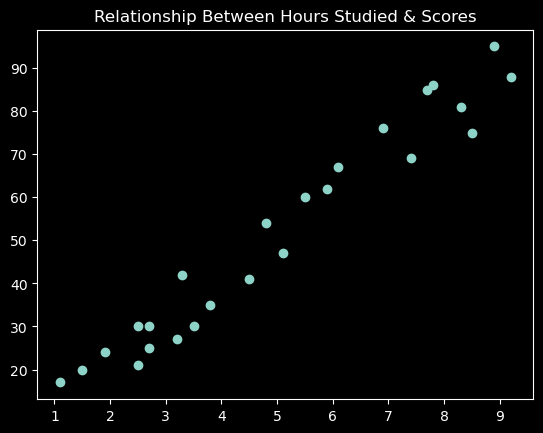

In [212]:
#Checking the relationship between feature and the label
plt.style.use('dark_background')
plt.scatter(data=df, x='Hours', y='Scores')
plt.title('Relationship Between Hours Studied & Scores')

From the above visualization we can simply see that there is a linear relationship between number of hours studied and score.

### Defining Feature & Label:
Feature(Attribute/Input), and Label(Output)

In [213]:
x=df[['Hours']].values #making Hours 2d arry as, while fitting the model it requires 2d input for features
y=df['Scores'].values

### Spliting the data into training and test sets:

In [214]:
#Utilizing Scikit-learn library for spliting
from sklearn.model_selection import train_test_split as tts

In [215]:
x_train, x_test, y_train, y_test= tts(x,y, test_size=0.3, random_state=1)

### Let's train the model now:

In [216]:
#Using linear regression algorithm for training the model
#Utilizing Scikit-learn library to import the linear regression algorithm
from sklearn.linear_model import LinearRegression
#Using linear regression algorithm for training the model
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Let's visualize the best fit line:

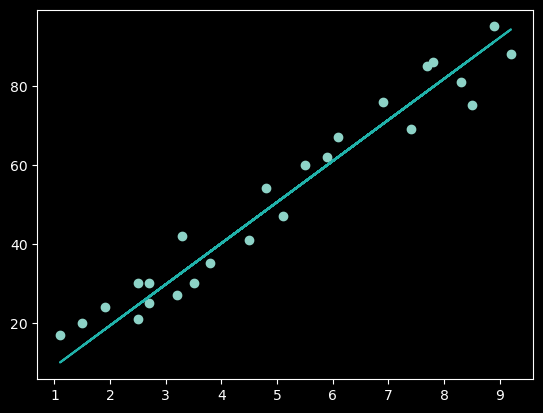

In [217]:
#equation of regression line
Line= lr.coef_*x+lr.intercept_

#visualizing the results
plt.scatter(x,y)
plt.plot(x, Line, color='lightseagreen')
plt.show()

### Making Predictions;

In [218]:
y_pred= lr.predict(x_test)

### Actual vs Predicted

In [219]:
Prediction=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)

In [220]:
Prediction

,Actual,Predicted
0,17,9.939530
1,42,32.843201
2,24,18.268138
3,75,86.979152
4,54,48.459341
5,85,78.650544
6,67,61.993329
7,69,75.527316


### Evaluating the model:

In [221]:
#using scikit-learn library to import the metrics
from sklearn import metrics as mt

In [222]:
#using R-squared(r2_score) as an metric to evaluate our model which returns a value
#It ranges from 0 to 1, and a higher value indicates a better fit.
round(mt.r2_score(y_test, y_pred),2)

0.89

In the above output one can see that our model is performing really well and is ready for real world predictions.

### Making function which will take hours as an input and will return score:
As while giving inputs into model to predict the result it takes 2d input, so for the convinence I am making function so that user can simply input the hrs and get score.

In [223]:
def predict_score(x):
    return round(lr.predict([[x]])[0],2)

### Predicting score of student wo studies 9.25 hrs/day:

In [224]:
predict_score(9.25)

94.79

### Saving the model to a file facilitates easy transfer and sharing:

In [225]:
import pickle

Pickle is a Python module that allows you to serialize and deserialize Python objects, making it easy to save and load machine learning models, among other things.

In [226]:
with open ("score_prediction_model.pkl", "wb") as file:
    pickle.dump(lr, file)

Now one can easily use this "score_prediction_model.pkl" file only to import the model without loading this entire ipynb file, and utilize it for predictions.

---